## Тема “Обучение без учителя”

#### Задание 1

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = boston.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [9]:
scaler = StandardScaler()

In [10]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


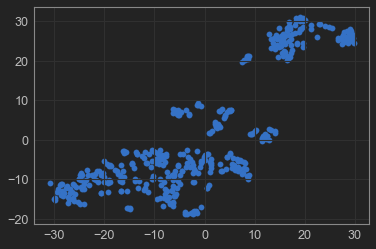

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#### Задание 2

In [13]:
from sklearn.cluster import KMeans
import collections

Counter({2: 191, 1: 127, 0: 86})


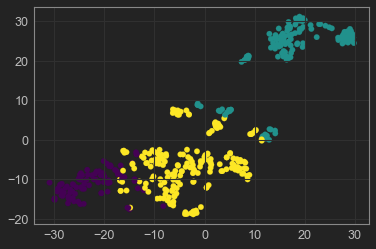

In [14]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

# centers = scaler.inverse_transform(kmeans.cluster_centers_)
# plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

print(collections.Counter(labels_train))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [15]:
print(f'0 кластер: средняя цена: {y_train[labels_train==0].mean():.2f}, средняя криминальность: {X_train.CRIM[labels_train==0].mean():.2f}')
print(f'1 кластер: средняя цена: {y_train[labels_train==1].mean():.2f}, средняя криминальность: {X_train.CRIM[labels_train==1].mean():.2f}')
print(f'2 кластер: средняя цена: {y_train[labels_train==2].mean():.2f}, средняя криминальность: {X_train.CRIM[labels_train==2].mean():.2f}')

0 кластер: средняя цена: 27.79, средняя криминальность: 0.07
1 кластер: средняя цена: 16.17, средняя криминальность: 10.80
2 кластер: средняя цена: 24.96, средняя криминальность: 0.42


#### Задание 3

In [16]:
labels_test = kmeans.predict(X_test_scaled)

In [17]:
print(f'0 кластер: средняя цена: {y_test[labels_test==0].mean():.2f}, средняя криминальность: {X_test.CRIM[labels_test==0].mean():.2f}')
print(f'1 кластер: средняя цена: {y_test[labels_test==1].mean():.2f}, средняя криминальность: {X_test.CRIM[labels_test==1].mean():.2f}')
print(f'2 кластер: средняя цена: {y_test[labels_test==2].mean():.2f}, средняя криминальность: {X_test.CRIM[labels_test==2].mean():.2f}')

0 кластер: средняя цена: 31.35, средняя криминальность: 0.06
1 кластер: средняя цена: 16.44, средняя криминальность: 10.17
2 кластер: средняя цена: 21.86, средняя криминальность: 0.27
